<a href="https://colab.research.google.com/github/bintangsholu21/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 2 – Penggunaan Numpy dan OpenCV serta Pengenalan Aplikasi-aplikasi Pengolahan Citra**

**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

---

Nama : Muhammad Bintang Sholu Firmansyah

Kelas : TI-3G

No Absen : 16

NIM : 2141720101

---


**PRAKTIKUM**



1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.

2. Akses folder images pada Google Drive Anda dengan kode berikut:






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



   Ikuti alur autorisasinya hingga muncul pesan: “Mounted at /content/drive”.

3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:

*g(x, y) = f(x, y) + b*

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google colab:

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


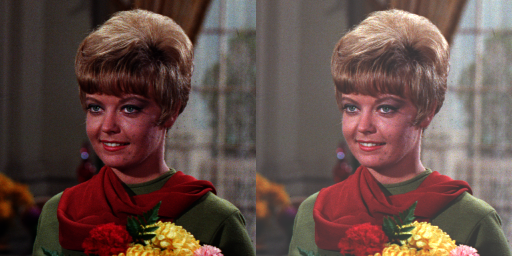

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


---
**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Inverse Image
----------------------------------
Masukkan nilai kecerahan inverse: 50


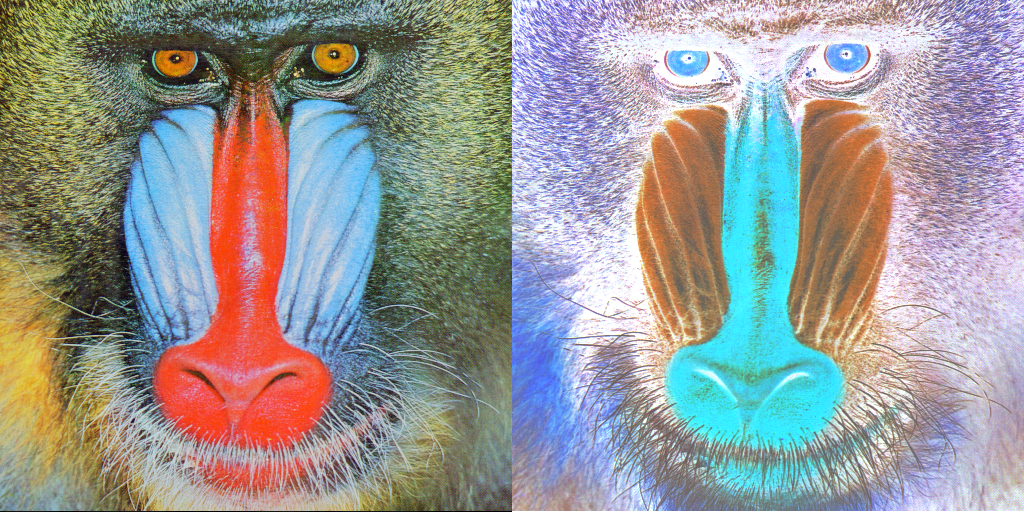

In [6]:
print('Inverse Image')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan inverse: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(255 - original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Contrast Image
----------------------------------
Masukkan nilai kecerahan contrast: 50
Masukkan kontras [1.0 - 3.0]: 2


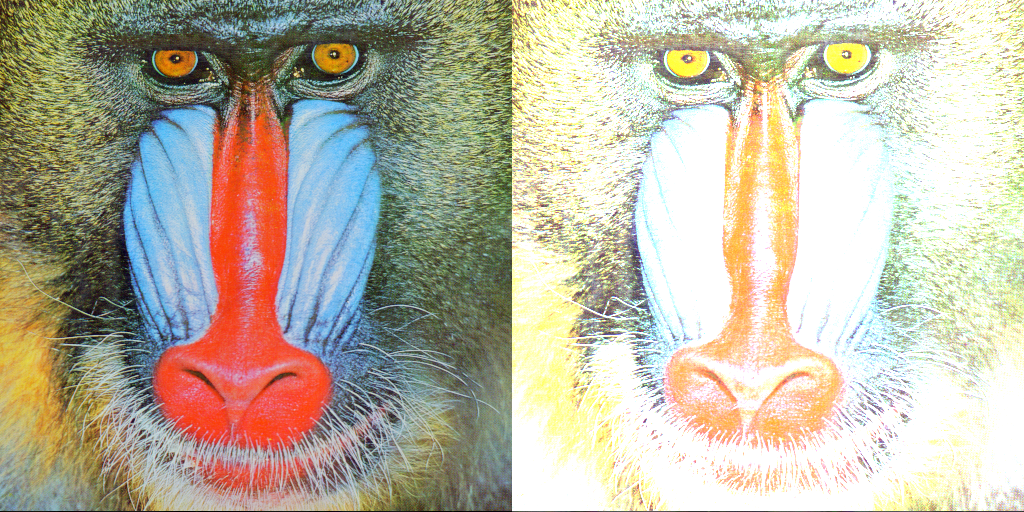

In [9]:
print('Contrast Image')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan contrast: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 30


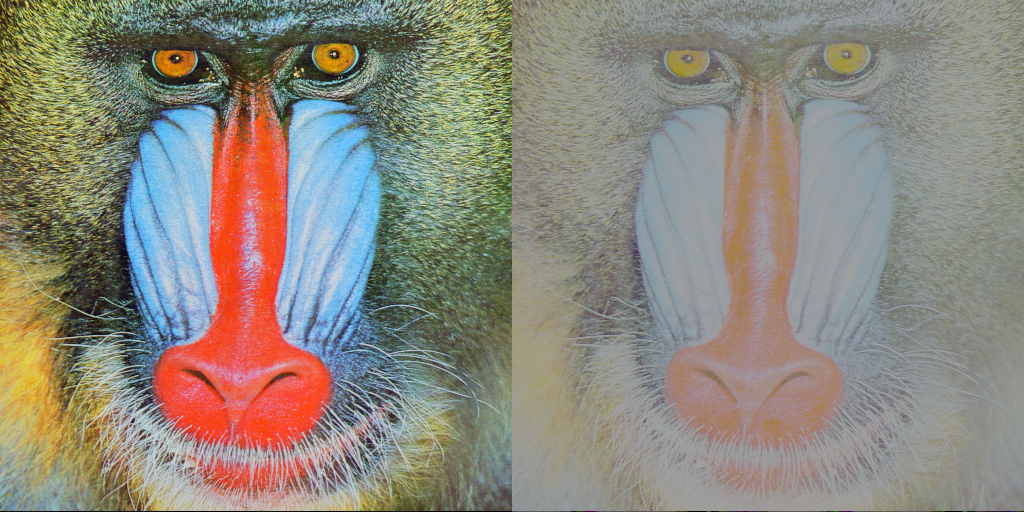

In [11]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)




4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:





a. **Averaging**

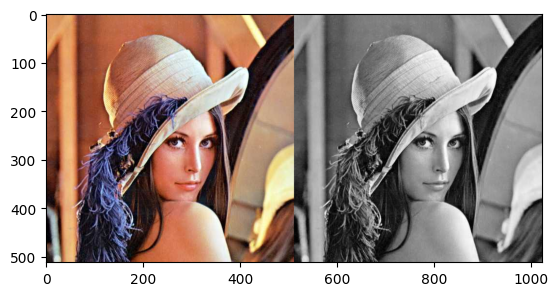

In [28]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
grayscale_image = np.zeros_like(img)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        r = int(img[y, x, 2])
        g = int(img[y, x, 1])
        b = int(img[y, x, 0])

        grayscale_averaging = np.clip((r + g + b) / 3, 0, 255)

        grayscale_image[y, x, 0] = grayscale_averaging
        grayscale_image[y, x, 1] = grayscale_averaging
        grayscale_image[y, x, 2] = grayscale_averaging

final_frame_grayscale = cv.hconcat([img, grayscale_image])
plt.imshow(final_frame_grayscale)


b. **Lightness**

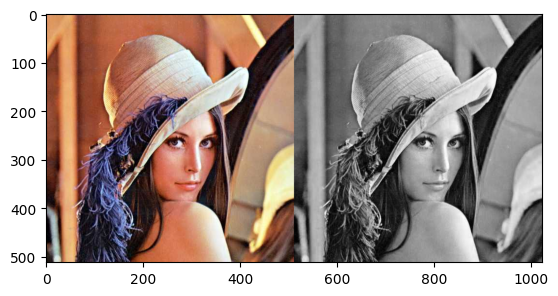

In [29]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
grayscale_image = np.zeros_like(img)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        r = int(img[y, x, 2])
        g = int(img[y, x, 1])
        b = int(img[y, x, 0])

        grayscale_lightness = (max(r, g, b) + min(r, g, b)) / 2

        grayscale_image[y, x, 0] = grayscale_lightness
        grayscale_image[y, x, 1] = grayscale_lightness
        grayscale_image[y, x, 2] = grayscale_lightness

final_frame_grayscale = cv.hconcat([img, grayscale_image])
plt.imshow(final_frame_grayscale)

c. **Luminance**

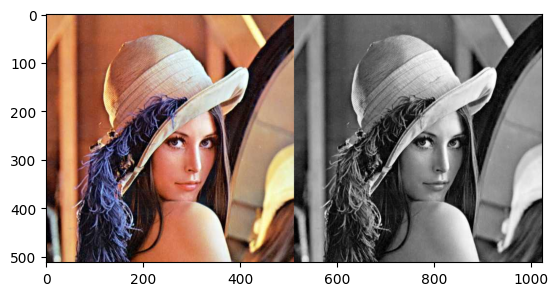

In [30]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
grayscale_image = np.zeros_like(img)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        r = int(img[y, x, 2])
        g = int(img[y, x, 1])
        b = int(img[y, x, 0])

        grayscale_luminance = 0.21 * r + 0.72 * g + 0.07 * b

        grayscale_image[y, x, 0] = grayscale_luminance
        grayscale_image[y, x, 1] = grayscale_luminance
        grayscale_image[y, x, 2] = grayscale_luminance

final_frame_grayscale = cv.hconcat([img, grayscale_image])
plt.imshow(final_frame_grayscale)


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

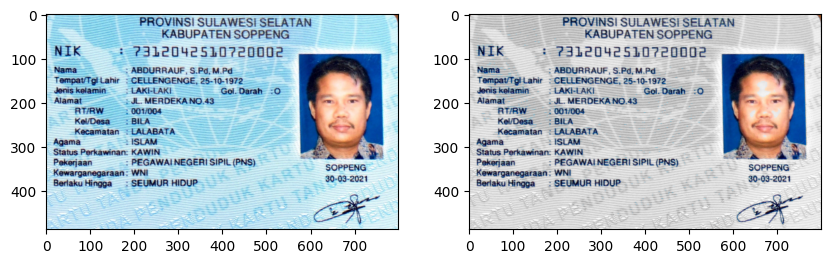

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/sample/KTP.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img_rgb[:, :, 2], 200, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:, :, 2] = mask

gray_background = cv.cvtColor(mask3, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_gray = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)

# Mengatur latar belakang abu-abu menjadi warna asli
img_gray[mask3[:, :, 2] == 0] = img_rgb[mask3[:, :, 2] == 0]

img_blue_text = img_rgb.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask3[i, j, 2] == 255:
            img_blue_text[i, j] = [0, 0, 255]

# Mengatur alpha channel hanya pada latar belakang
alpha_channel = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
alpha_channel[mask3[:, :, 2] == 50] = 0

# Menggabungkan gambar utama dengan alpha channel
out = np.dstack((img_gray, alpha_channel))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[1].imshow(out)
plt.show()